<a href="https://colab.research.google.com/github/ancestor9/Affalatoxin-Analysis/blob/main/weather_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: /content/drive/MyDrive/식약처/data/농업기상정보.csv 을 읽어줘

import pandas as pd

# Assuming the file is a CSV and comma-separated
try:
    df_agricultural_weather = pd.read_csv('/content/drive/MyDrive/식약처/data/농업기상정보.csv')
    print(df_agricultural_weather.head()) # Print the first few rows to verify
except FileNotFoundError:
    print("Error: The file was not found. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")



/tmp/ipython-input-1-118274761.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_agricultural_weather = pd.read_csv('/content/drive/MyDrive/식약처/data/농업기상정보.csv')


  obsr_Spot_Code   date_Time  tmprt_150  tmprt_150Top  tmprt_150Lwet  \
0            NaN  2013-01-01        NaN           NaN            NaN   
1            NaN  2013-01-02        NaN           NaN            NaN   
2            NaN  2013-01-03        NaN           NaN            NaN   
3            NaN  2013-01-04        NaN           NaN            NaN   
4            NaN  2013-01-05        NaN           NaN            NaN   

   tmprt_50  tmprt_50Top  tmprt_50Lwet  tmprt_400  tmprt_400Top  ...  \
0       NaN          NaN           NaN        NaN           NaN  ...   
1       NaN          NaN           NaN        NaN           NaN  ...   
2       NaN          NaN           NaN        NaN           NaN  ...   
3       NaN          NaN           NaN        NaN           NaN  ...   
4       NaN          NaN           NaN        NaN           NaN  ...   

   pnwg_tp5_top  pnwg_tp5_lwet  udgr_heatt_cndctvt_top  \
0           NaN            NaN                     NaN   
1           NaN   

In [2]:
df_agricultural_weather

,obsr_Spot_Code,date_Time,tmprt_150,tmprt_150Top,tmprt_150Lwet,tmprt_50,tmprt_50Top,tmprt_50Lwet,tmprt_400,tmprt_400Top,...,pnwg_tp5_top,pnwg_tp5_lwet,udgr_heatt_cndctvt_top,udgr_heatt_cndctvt_lwet,soil_mitr_10_cmst_top,soil_mitr_10_cmst_lwet,soil_mitr_20_cmst_top,soil_mitr_20_cmst_lwet,soil_mitr_30_cmst_top,soil_mitr_30_cmst_lwet
0,NaN,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989298,320862A001,2025-06-24,22.5,26.8,19.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989299,320862A001,2025-06-25,21.6,23.2,20.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989300,320862A001,2025-06-26,23.2,27.4,20.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989301,320862A001,2025-06-27,25.6,31.3,21.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# prompt: df_agricultural_weather 의 각 컬럼의 결측치, 결측치 비율, max, min 값을 보여주는 데이터프레임을 보여줘

import pandas as pd
# Create a dictionary to store the results
summary_dict = {}

# Iterate through each column in the DataFrame
for col in df_agricultural_weather.columns:
    missing_count = df_agricultural_weather[col].isnull().sum()
    missing_ratio = missing_count / len(df_agricultural_weather) * 100

    # Check if the column is numeric before calculating min and max
    if pd.api.types.is_numeric_dtype(df_agricultural_weather[col]):
        col_min = df_agricultural_weather[col].min()
        col_max = df_agricultural_weather[col].max()
    else:
        col_min = None # Or 'Not Applicable' or some other indicator
        col_max = None # Or 'Not Applicable' or some other indicator


    summary_dict[col] = {
        '결측치': missing_count,
        '결측치 비율 (%)': missing_ratio,
        'min': col_min,
        'max': col_max
    }

# Convert the dictionary to a DataFrame
summary_df = pd.DataFrame.from_dict(summary_dict, orient='index')

# Display the summary DataFrame
summary_df

,결측치,결측치 비율 (%),min,max
obsr_Spot_Code,153680,15.534169,NaN,NaN
date_Time,0,0.000000,NaN,NaN
tmprt_150,241482,24.409306,-49.4,49.5
tmprt_150Top,241524,24.413552,-50.0,50.0
tmprt_150Lwet,241490,24.410115,-50.0,50.0
...,...,...,...,...
soil_mitr_10_cmst_lwet,593294,59.970909,-56.4,50.0
soil_mitr_20_cmst_top,989303,100.000000,NaN,NaN
soil_mitr_20_cmst_lwet,989303,100.000000,NaN,NaN
soil_mitr_30_cmst_top,965071,97.550599,-3.4,50.0


In [33]:
summary_df.index

Index(['obsr_Spot_Code', 'date_Time', 'tmprt_150', 'tmprt_150Top',
       'tmprt_150Lwet', 'tmprt_50', 'tmprt_50Top', 'tmprt_50Lwet', 'tmprt_400',
       'tmprt_400Top', 'tmprt_400Lwet', 'hd_150', 'hd_50', 'hd_400', 'wd_300',
       'wd_150', 'wd_1000', 'arvlty_300', 'arvlty_300Top', 'arvlty_150',
       'arvlty_150Top', 'arvlty_1000', 'arvlty_1000Top', 'afp', 'afv',
       'sunshn_Time', 'solrad_Qy', 'dwcn_Time', 'pnwg_Tp', 'frfr_Tp',
       'udgr_Heatt_Cndctvt', 'udgr_Tp_10', 'udgr_Tp_5', 'udgr_Tp_20',
       'soil_Mitr_10', 'soil_Mitr_10Cmst', 'soil_Mitr_20', 'soil_Mitr_20Cmst',
       'soil_Mitr_30', 'soil_Mitr_30Cmst', 'wd_300_top', 'wd_300_lwet',
       'wd_150_top', 'wd_150_lwet', 'wd_1000_top', 'wd_1000_lwet',
       'arvlty_300_lwet', 'arvlty_150_lwet', 'arvlty_1000_lwet', 'hd_150_top',
       'hd_150_lwet', 'hd_50_top', 'hd_50_lwet', 'hd_400_top', 'hd_400_lwet',
       'soil_mitr_10_top', 'soil_mitr_10_lwet', 'soil_mitr_20_top',
       'soil_mitr_20_lwet', 'soil_mitr_30_top',

In [7]:
# prompt: summary_df을 결측치 비율 (%)로 소팅

summary_df_sorted = summary_df.sort_values(by='결측치 비율 (%)', ascending=True)
summary_df_sorted.head(20)

,결측치,결측치 비율 (%),min,max
date_Time,0,0.000000,NaN,NaN
obsr_Spot_Code,153680,15.534169,NaN,NaN
afp,209427,21.169146,0.0,500.0
hd_150_lwet,230249,23.273860,0.0,100.0
hd_150,230719,23.321369,0.0,100.0
hd_150_top,232262,23.477337,0.0,100.0
tmprt_150,241482,24.409306,-49.4,49.5
tmprt_150Lwet,241490,24.410115,-50.0,50.0
tmprt_150Top,241524,24.413552,-50.0,50.0
wd_300_top,311132,31.449617,-999.0,359.9


In [34]:
summary_df_sorted.index[:10]

Index(['date_Time', 'obsr_Spot_Code', 'afp', 'hd_150_lwet', 'hd_150',
       'hd_150_top', 'tmprt_150', 'tmprt_150Lwet', 'tmprt_150Top',
       'wd_300_top'],
      dtype='object')

In [35]:
# 아래 컬럼이 온도 같음
temps = ['date_Time', 'obsr_Spot_Code', 'tmprt_150', 'tmprt_150Lwet', 'tmprt_150Top']

In [48]:
df = df_agricultural_weather[temps]
df

,date_Time,obsr_Spot_Code,tmprt_150,tmprt_150Lwet,tmprt_150Top
0,2013-01-01,NaN,NaN,NaN,NaN
1,2013-01-02,NaN,NaN,NaN,NaN
2,2013-01-03,NaN,NaN,NaN,NaN
3,2013-01-04,NaN,NaN,NaN,NaN
4,2013-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...
989298,2025-06-24,320862A001,22.5,19.5,26.8
989299,2025-06-25,320862A001,21.6,20.0,23.2
989300,2025-06-26,320862A001,23.2,20.5,27.4
989301,2025-06-27,320862A001,25.6,21.4,31.3


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989303 entries, 0 to 989302
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date_Time       989303 non-null  object 
 1   obsr_Spot_Code  835623 non-null  object 
 2   tmprt_150       747821 non-null  float64
 3   tmprt_150Lwet   747813 non-null  float64
 4   tmprt_150Top    747779 non-null  float64
dtypes: float64(3), object(2)
memory usage: 37.7+ MB


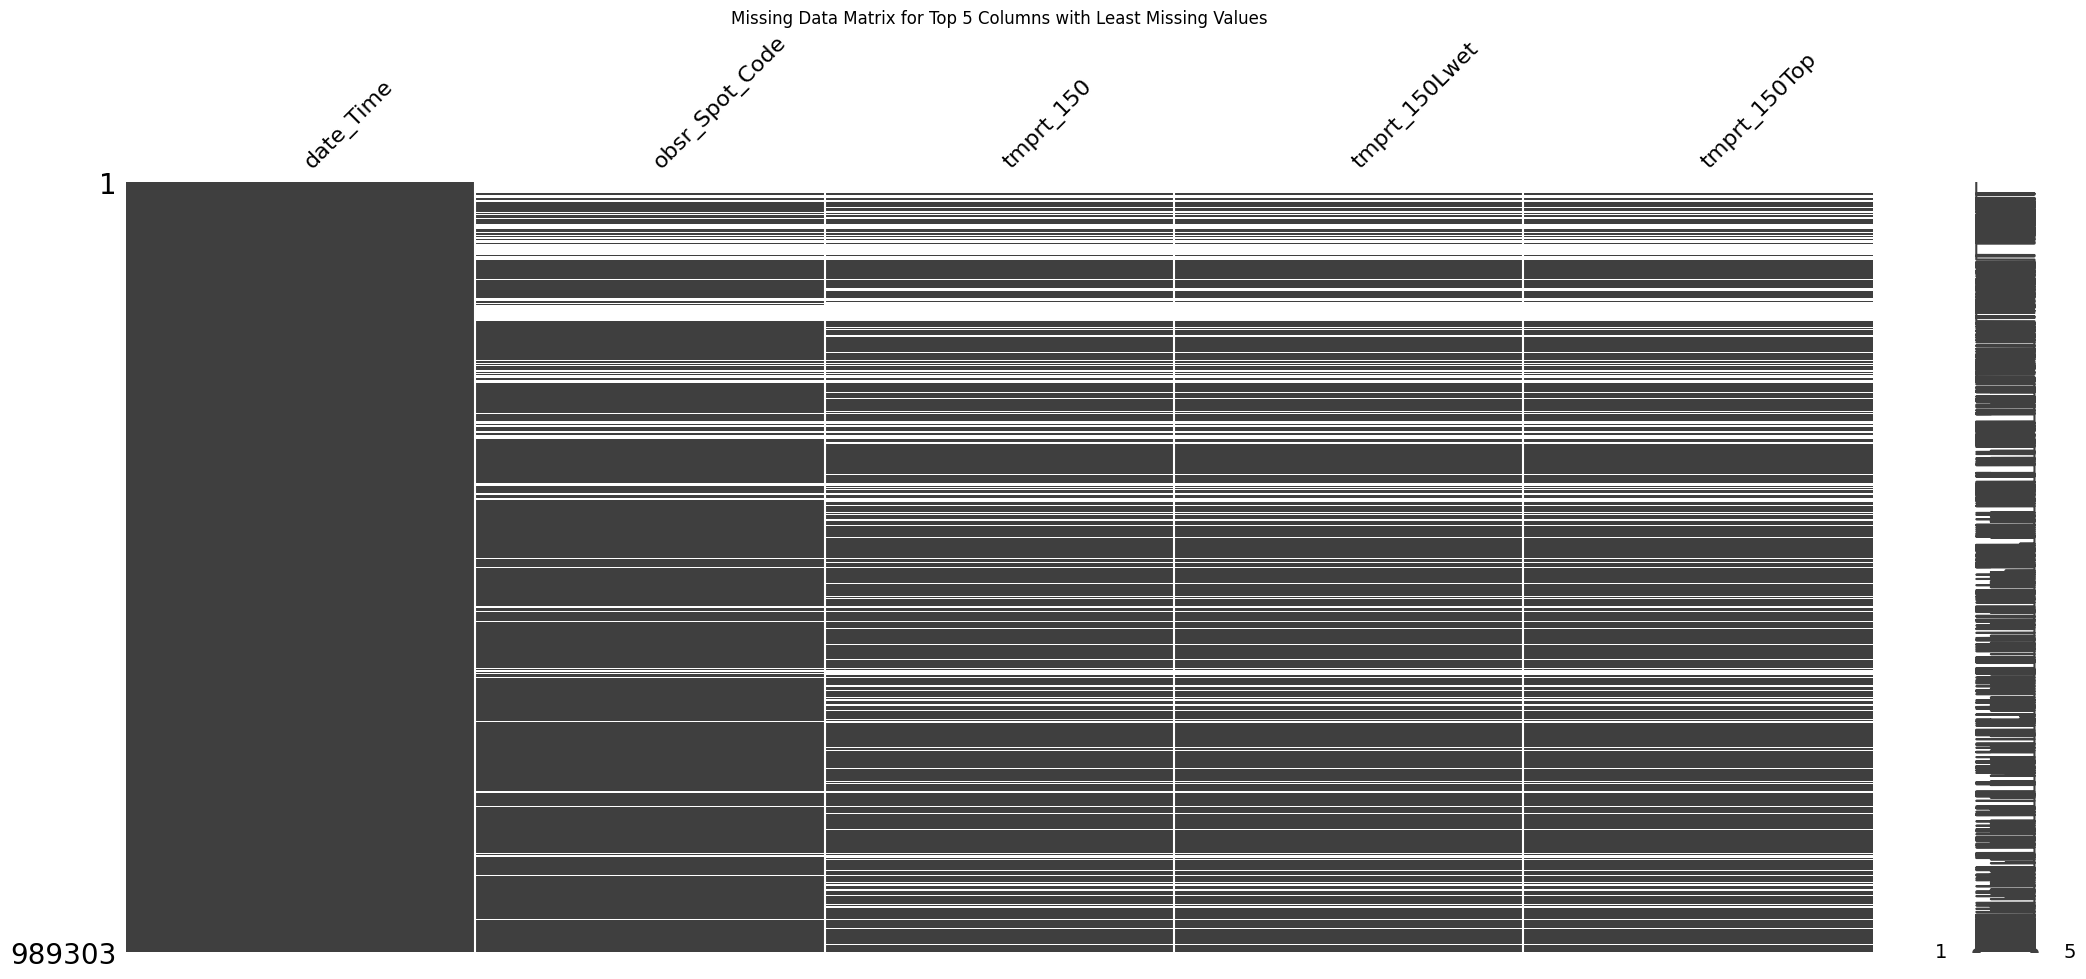

In [50]:
# prompt: missingno

import missingno as msno
import matplotlib.pyplot as plt

# Use the 'df' DataFrame that was created in the preceding code
msno.matrix(df)
plt.title('Missing Data Matrix for Top 5 Columns with Least Missing Values')
plt.show()

## 온도 데이터 결측치가 있는데, 장소 데이터 값이 Nan이 아니라고 해도 온도 데이터 Nan이 존재함

In [51]:
# prompt: obsr_Spot_Code  가 nan인 데이터는 제거

df.dropna(subset=['obsr_Spot_Code'], inplace=True)

/tmp/ipython-input-51-1892154578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['obsr_Spot_Code'], inplace=True)


<Axes: >

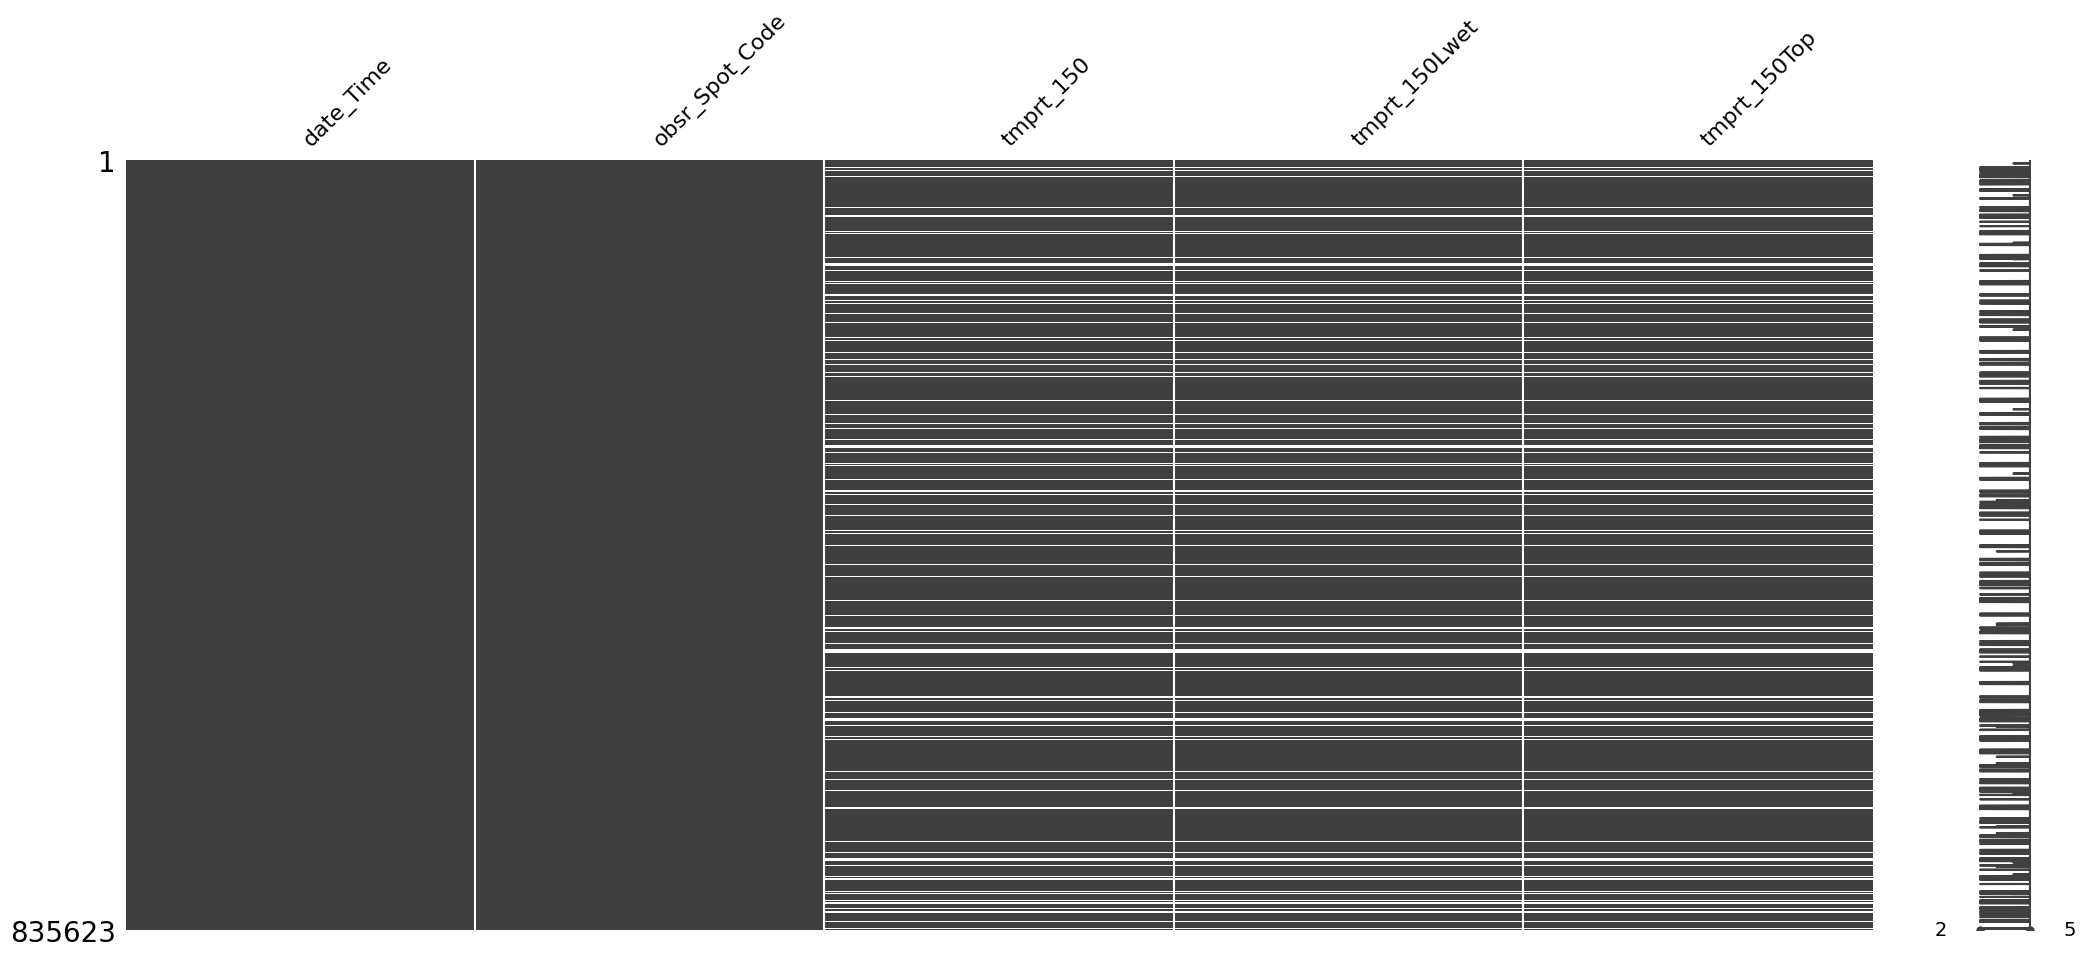

In [52]:
msno.matrix(df)

In [53]:
# 결측치 비율
df.isnull().sum()/len(df)*100

,0
date_Time,0.000000
obsr_Spot_Code,0.000000
tmprt_150,10.507370
tmprt_150Lwet,10.508327
tmprt_150Top,10.512396


In [43]:
df.head(10)

,date_Time,obsr_Spot_Code,tmprt_150,tmprt_150Lwet,tmprt_150Top
14600,2013-01-01,200821A001,-10.4,-18.1,-1.9
14601,2013-01-02,200821A001,-13.2,-23.0,-4.1
14602,2013-01-03,200821A001,-18.4,-25.4,-8.8
14603,2013-01-04,200821A001,-17.5,-24.5,-7.4
14604,2013-01-05,200821A001,-14.9,-22.1,-4.4
14605,2013-01-06,200821A001,-11.5,-18.2,-3.3
14606,2013-01-07,200821A001,-11.9,-18.7,-1.2
14607,2013-01-08,200821A001,-10.4,-17.3,0.1
14608,2013-01-09,200821A001,-13.4,-20.3,-4.7
14609,2013-01-10,200821A001,-14.5,-22.8,-2.9


In [54]:
# prompt: df의 date_Time을 날짜데이터로 변환
df['date_Time'] = pd.to_datetime(df['date_Time'])
df.head(10)

/tmp/ipython-input-54-2424213929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_Time'] = pd.to_datetime(df['date_Time'])


,date_Time,obsr_Spot_Code,tmprt_150,tmprt_150Lwet,tmprt_150Top
14600,2013-01-01,200821A001,-10.4,-18.1,-1.9
14601,2013-01-02,200821A001,-13.2,-23.0,-4.1
14602,2013-01-03,200821A001,-18.4,-25.4,-8.8
14603,2013-01-04,200821A001,-17.5,-24.5,-7.4
14604,2013-01-05,200821A001,-14.9,-22.1,-4.4
14605,2013-01-06,200821A001,-11.5,-18.2,-3.3
14606,2013-01-07,200821A001,-11.9,-18.7,-1.2
14607,2013-01-08,200821A001,-10.4,-17.3,0.1
14608,2013-01-09,200821A001,-13.4,-20.3,-4.7
14609,2013-01-10,200821A001,-14.5,-22.8,-2.9


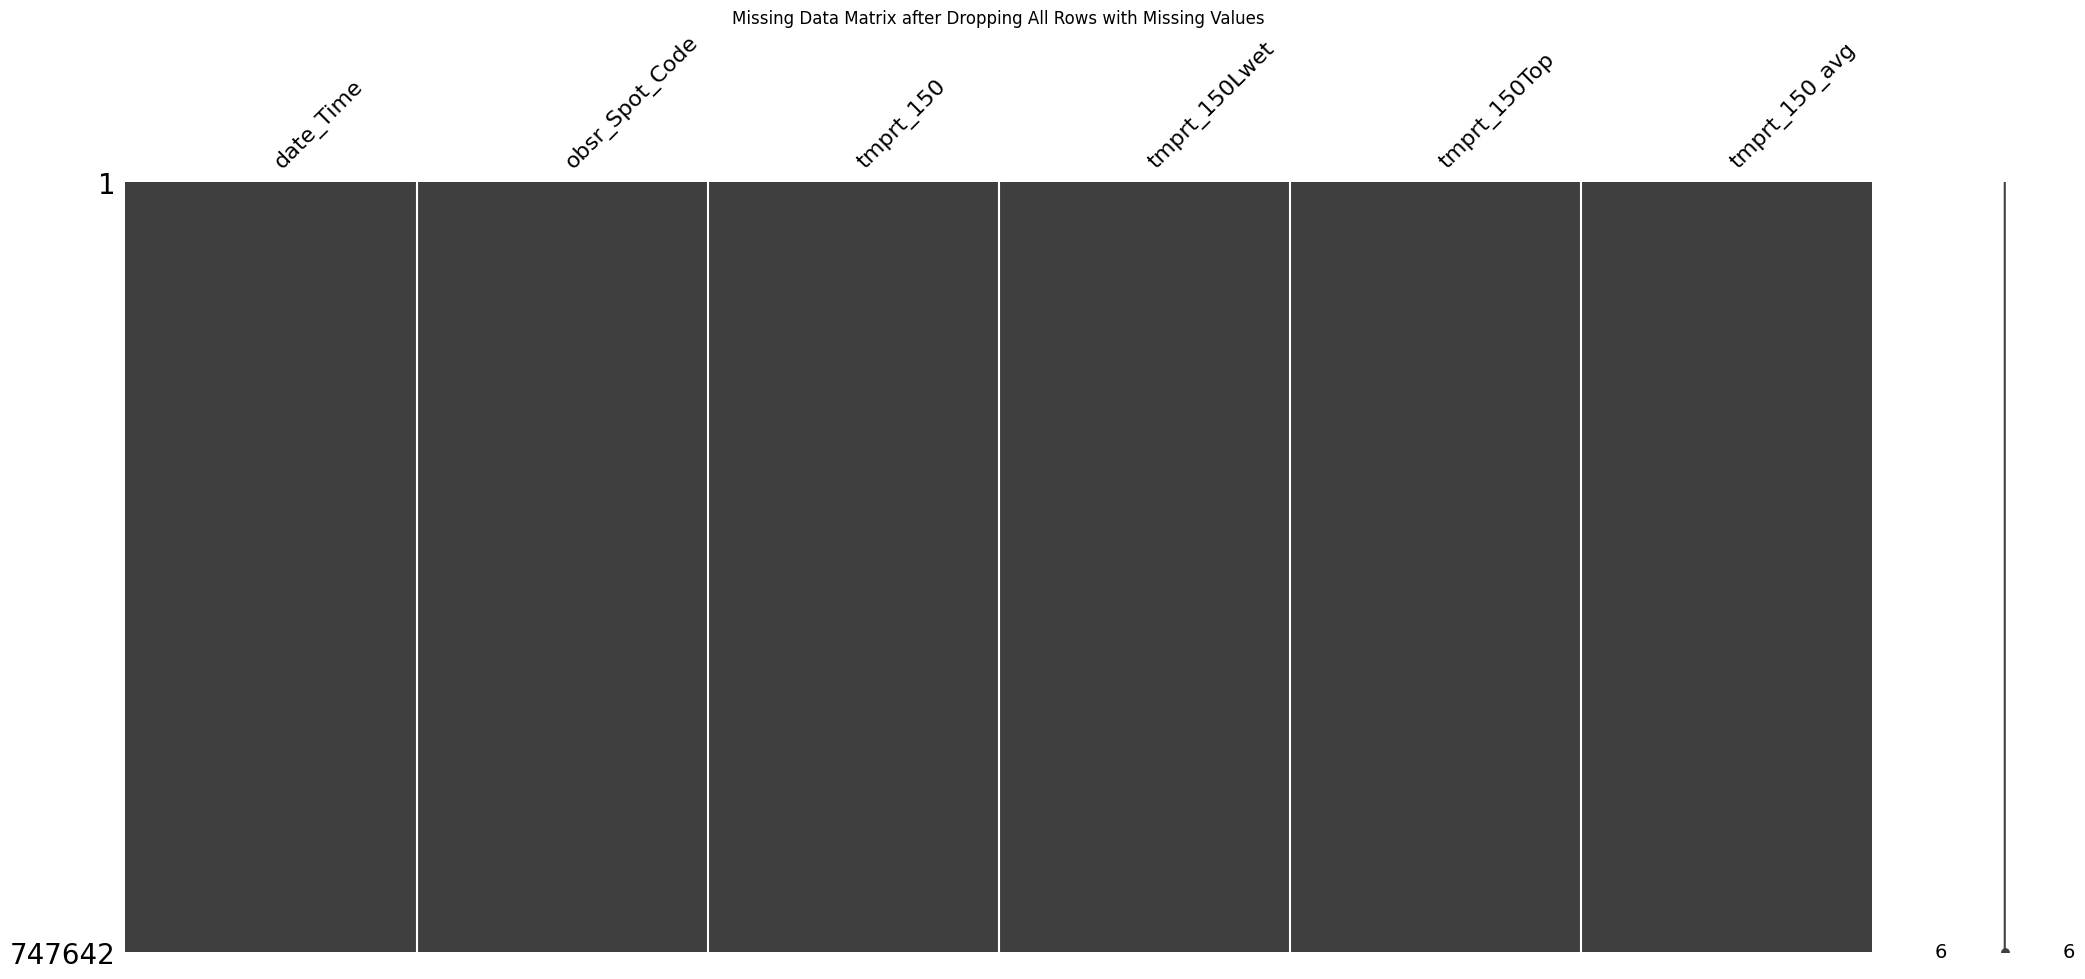

Shape of DataFrame after dropping missing values: (747642, 6)


In [57]:
# prompt: 결측치는 모두 제거

import matplotlib.pyplot as plt
df_cleaned = df.dropna()
msno.matrix(df_cleaned)
plt.title('Missing Data Matrix after Dropping All Rows with Missing Values')
plt.show()
print("Shape of DataFrame after dropping missing values:", df_cleaned.shape)

## 시계열 데이터 분석

In [58]:
df_cleaned

,date_Time,obsr_Spot_Code,tmprt_150,tmprt_150Lwet,tmprt_150Top,tmprt_150_avg
480614,2019-10-02,011104F031,19.5,16.0,24.0,19.5
480615,2019-10-03,011104F031,20.1,14.5,25.4,20.1
480616,2019-10-04,011104F031,19.0,12.7,26.5,19.0
480617,2019-10-05,011104F031,16.1,10.7,19.4,16.1
480618,2019-10-06,011104F031,14.4,8.3,21.9,14.4
...,...,...,...,...,...,...
984822,2025-06-23,791945A001,24.5,17.6,31.9,24.5
984823,2025-06-24,791945A001,20.3,17.2,24.3,20.3
984824,2025-06-25,791945A001,20.5,18.9,22.6,20.5
984825,2025-06-26,791945A001,24.6,18.9,31.0,24.6


In [62]:
df = df_cleaned[['date_Time', 'obsr_Spot_Code', 'tmprt_150']].set_index('date_Time')
df

,obsr_Spot_Code,tmprt_150
date_Time,,
2019-10-02,011104F031,19.5
2019-10-03,011104F031,20.1
2019-10-04,011104F031,19.0
2019-10-05,011104F031,16.1
2019-10-06,011104F031,14.4
...,...,...
2025-06-23,791945A001,24.5
2025-06-24,791945A001,20.3
2025-06-25,791945A001,20.5


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


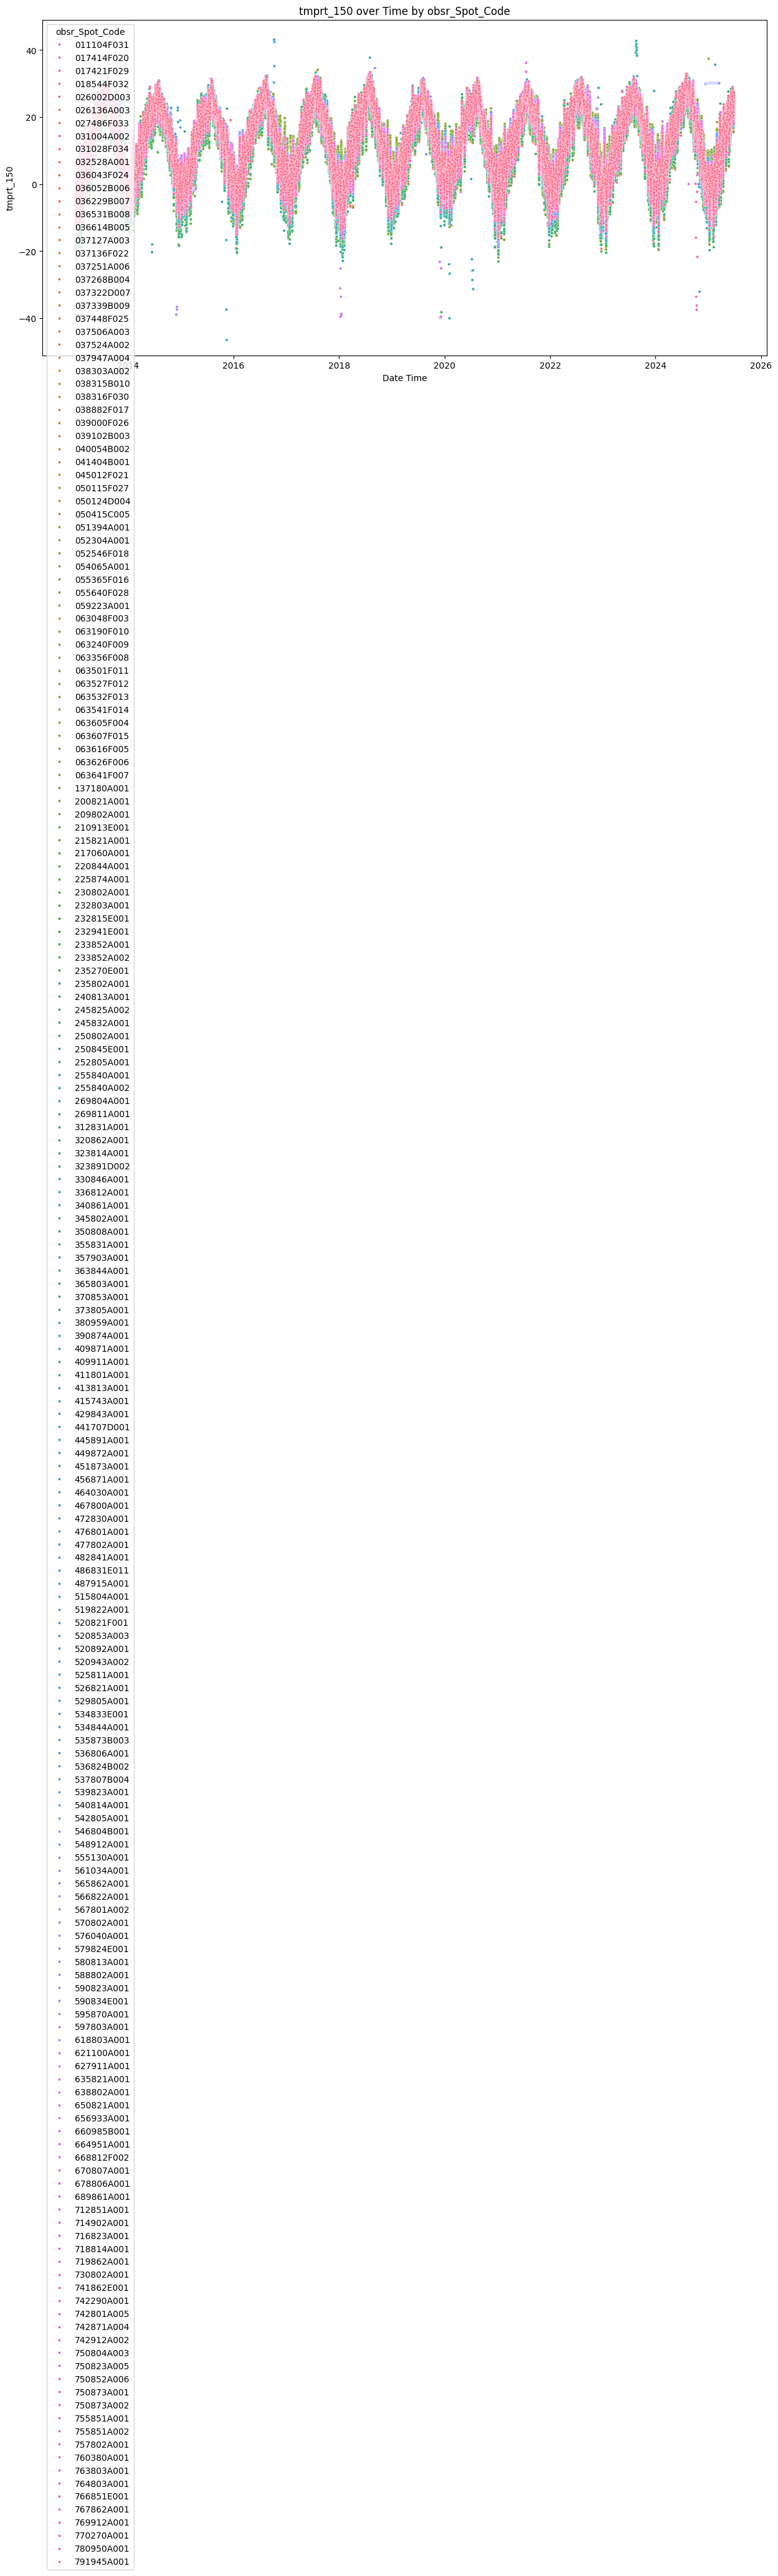

In [64]:
# prompt: tmprt_150의 시계열 데이터를 seaborn scatter 시각화

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x=df.index, y='tmprt_150', hue='obsr_Spot_Code', s=10)
plt.title('tmprt_150 over Time by obsr_Spot_Code')
plt.xlabel('Date Time')
plt.ylabel('tmprt_150')
plt.show()

### 대한민국 시군구 개수
2025년 7월 기준 대한민국의 시군구(기초자치단체)는 250개로 구성되어 있습니다.

시군구 세부 구성
시: 75개

군: 82개

구: 69개

특별자치시: 1개 (세종특별자치시, 별도 분류)

특별자치도(제주): 행정시 2개(제주시, 서귀포시) 포함

이 수치는 행정안전부 및 통계청 공식 자료를 기반으로 하며, 대한민국 전체를 행정적으로 구분한 기초지방자치단체의 총합입니다

In [68]:
# 194개 지역이 있군, 각 시군구인 듯....
df['obsr_Spot_Code'].nunique()

194

### 데이터를 sampling

In [75]:
sf = df.sample(frac = 0.1)
sf

,obsr_Spot_Code,tmprt_150
date_Time,,
2016-04-10,040054B002,14.4
2017-01-23,536824B002,-1.7
2022-04-27,660985B001,18.3
2017-07-25,026136A003,25.3
2014-07-04,269811A001,23.5
...,...,...
2018-07-31,656933A001,29.8
2014-12-04,250845E001,-9.0
2024-12-30,534844A001,7.6


<Axes: xlabel='date_Time', ylabel='tmprt_150'>

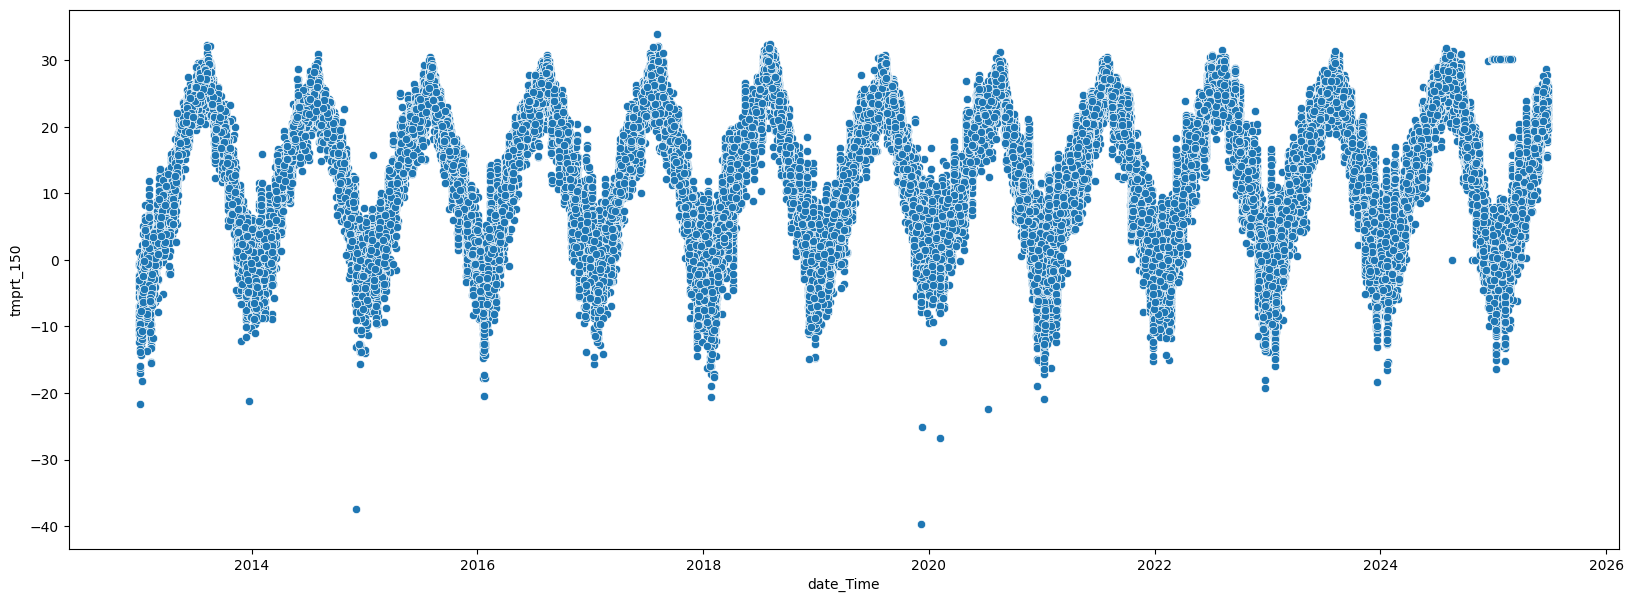

In [76]:
plt.figure(figsize=(20, 7))
sns.scatterplot(data=sf, x=sf.index, y='tmprt_150')

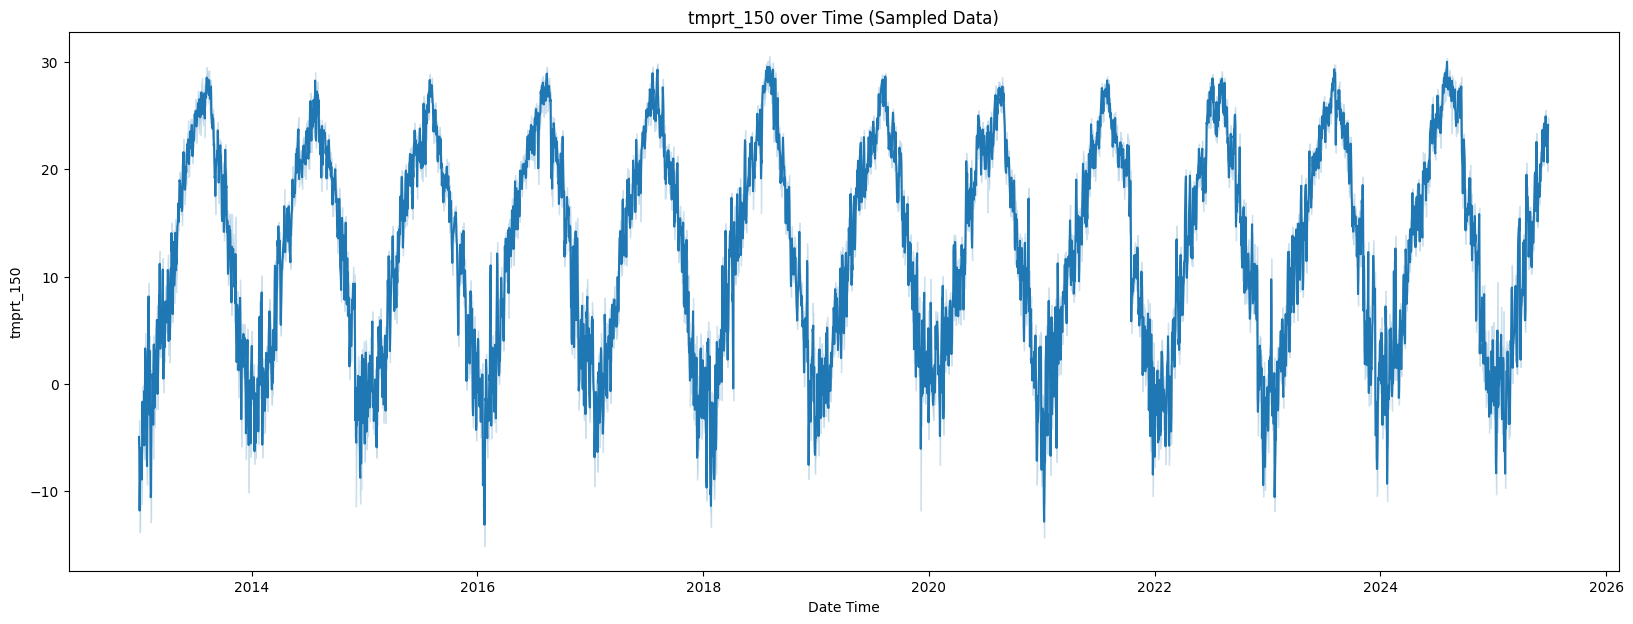

In [77]:
# prompt: seaborn linplot으로

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
sns.lineplot(data=sf, x=sf.index, y='tmprt_150')
plt.title('tmprt_150 over Time (Sampled Data)')
plt.xlabel('Date Time')
plt.ylabel('tmprt_150')
plt.show()

### 시간이 너무걸림,
- 같은 패턴이 반복되니 최근 5년치만 가지고 예측해도 될 듯

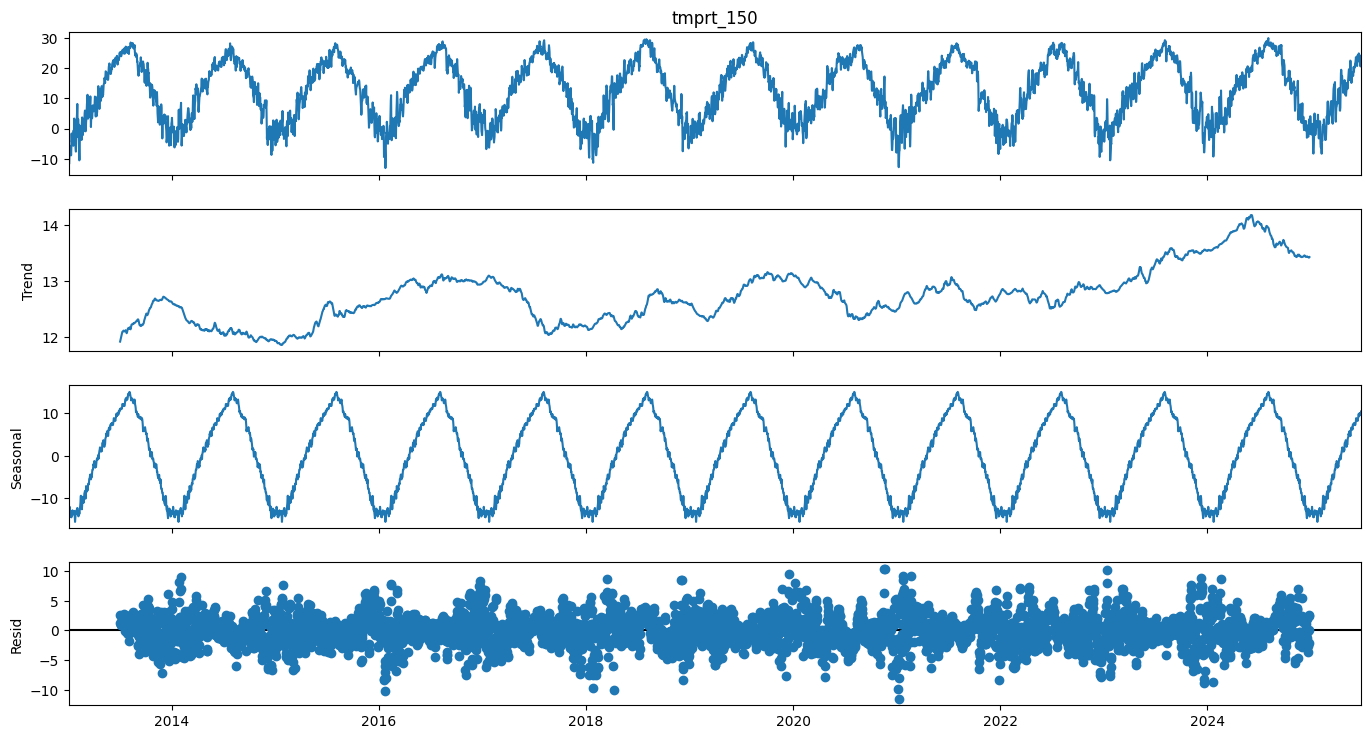

In [78]:
# prompt: sf의 추세, 계절서응ㄹ decomposition해서 보야줘

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Sort the sampled DataFrame by index (date_Time)
sf = sf.sort_index()

# Resample the data to a lower frequency, e.g., daily mean, to make decomposition feasible
# Adjust the resampling frequency ('D' for daily) if needed based on your data and goals
# For this example, let's resample to daily mean
sf_resampled = sf['tmprt_150'].resample('D').mean().dropna()


# Perform seasonal decomposition
# model='additive' is generally suitable when the seasonal fluctuations are roughly constant in amplitude
# model='multiplicative' is suitable when the seasonal fluctuations are proportional to the level of the series
# period should be set according to the expected seasonality (e.g., 365 for yearly, 7 for weekly if applicable)
# Given the data appears to be agricultural weather, yearly seasonality is likely significant.
# Let's try a period of 365 for yearly seasonality.
try:
    decomposition = seasonal_decompose(sf_resampled, model='additive', period=365) # Assuming yearly seasonality
    fig = decomposition.plot()
    fig.set_size_inches(15, 8)
    plt.show()
except Exception as e:
    print(f"Could not perform seasonal decomposition. Error: {e}")
    print("This might be due to insufficient data points for the specified period or other issues.")
    print("Consider checking the length of the resampled data and the chosen period.")
    print(f"Length of resampled data: {len(sf_resampled)}")



## Trend를 보니 기온은 계속 상승하는 추세이며 cycle이 반복됨